<a href="https://colab.research.google.com/github/ImpossiblePixie/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/usa_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### US Accidents Exploratory Data Analysis
TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)

Kaggle
informaiton about accidents
can use useful to prevent accidents
mention that this does not contain data about New York


In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('usa-accidents-analysis')
jovian.set_colab_id('1ib5J2zI1yHQvrkfQOr6M1N1Vn2etdS5U')

     |████████████████████████████████| 68 kB 899 kB/s 


usa-accidents-analysis

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="usa-accidents-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: [jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/p-subhash201/usa-accidents-analysis


'https://jovian.ai/p-subhash201/usa-accidents-analysis'

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download('https://www.kaggle.com/sobhanmoosavi/us-accidents')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: subhash7ms
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 167MB/s]


In [ ]:
data_filename = '/content/us-accidents/US_Accidents_Dec20_updated.csv'

### Data Preparation and Cleaning
Load the file using Pandas
Look at some information about the data & the columns
Fix any missing or incorrect values


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df['Temperature(F)']

0          42.1
1          36.9
2          36.0
3          36.0
4          39.0
           ... 
1516059    86.0
1516060    70.0
1516061    73.0
1516062    71.0
1516063    79.0
Name: Temperature(F), Length: 1516064, dtype: float64

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.51606e+06,1.51606e+06,1.51606e+06,1.51606e+06,1.51606e+06,1.51606e+06,469969,1.47303e+06,1.06675e+06,1.47056e+06,1.47979e+06,1.47185e+06,1.3872e+06,1.00552e+06
mean,2.23863,36.9006,-98.5992,36.9006,-98.599,0.587262,8907.53,59.5846,55.1098,64.6596,29.555,9.13176,7.63081,0.00847785
std,0.608148,5.16565,18.496,5.16563,18.4959,1.63266,22421.9,18.2732,21.1273,23.2599,1.01676,2.88911,5.63736,0.129317
min,1,24.5702,-124.498,24.5701,-124.498,0,0,-89,-89,1,0,0,0,0
25%,2,33.8542,-118.208,33.8542,-118.208,0,1212,47,40.8,48,29.44,10,4.6,0
50%,2,37.3511,-94.381,37.3513,-94.3799,0.178,4000,61,57,68,29.88,10,7,0
75%,2,40.7259,-80.8747,40.7259,-80.8745,0.594,10100,73,71,84,30.04,10,10.4,0
max,4,49.0006,-67.1132,49.075,-67.1092,155.186,1e+07,170.6,113,100,58.04,140,984,24


In [ ]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1516064.0,1516064.0,1516064.0,1516064.0,1516064.0,1516064.0,469969.0,1473031.0,1066748.0,1470555.0,1479790.0,1471853.0,1387202.0,1005515.0
mean,2.2,36.9,-98.6,36.9,-98.6,0.6,8907.5,59.6,55.1,64.7,29.6,9.1,7.6,0.0
std,0.6,5.2,18.5,5.2,18.5,1.6,22421.9,18.3,21.1,23.3,1.0,2.9,5.6,0.1
min,1.0,24.6,-124.5,24.6,-124.5,0.0,0.0,-89.0,-89.0,1.0,0.0,0.0,0.0,0.0
25%,2.0,33.9,-118.2,33.9,-118.2,0.0,1212.0,47.0,40.8,48.0,29.4,10.0,4.6,0.0
50%,2.0,37.4,-94.4,37.4,-94.4,0.2,4000.0,61.0,57.0,68.0,29.9,10.0,7.0,0.0
75%,2.0,40.7,-80.9,40.7,-80.9,0.6,10100.0,73.0,71.0,84.0,30.0,10.0,10.4,0.0
max,4.0,49.0,-67.1,49.1,-67.1,155.2,9999997.0,170.6,113.0,100.0,58.0,140.0,984.0,24.0


In [ ]:
df['Severity'].describe().apply(lambda x: format(x, 'f'))

count    1516064.000000
mean           2.238630
std            0.608148
min            1.000000
25%            2.000000
50%            2.000000
75%            2.000000
max            4.000000
Name: Severity, dtype: object

In [ ]:
df.round(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
df.shape

(1516064, 47)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.columns.value_counts()


Pressure(in)         1
Wind_Speed(mph)      1
Wind_Chill(F)        1
End_Lng              1
Start_Lat            1
Distance(mi)         1
Temperature(F)       1
Start_Lng            1
Humidity(%)          1
End_Lat              1
Severity             1
Number               1
Visibility(mi)       1
Precipitation(in)    1
dtype: int64

In [ ]:
len(newdf.columns)

14

In [ ]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [ ]:
df_dropped_null = df.dropna(axis= 0, how= 'all')

In [ ]:
df_dropped_null.notnull().sum()

ID                       1516064
Severity                 1516064
Start_Time               1516064
End_Time                 1516064
Start_Lat                1516064
Start_Lng                1516064
End_Lat                  1516064
End_Lng                  1516064
Distance(mi)             1516064
Description              1516064
Number                    469969
Street                   1516064
Side                     1516064
City                     1515981
County                   1516064
State                    1516064
Zipcode                  1515129
Country                  1516064
Timezone                 1513762
Airport_Code             1511816
Weather_Timestamp        1485800
Temperature(F)           1473031
Wind_Chill(F)            1066748
Humidity(%)              1470555
Pressure(in)             1479790
Visibility(mi)           1471853
Wind_Direction           1474206
Wind_Speed(mph)          1387202
Precipitation(in)        1005515
Weather_Condition        1472057
Amenity   

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) *100/ len(df)
missing_percentages

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
Amenity                   0.000000
Bump                      0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)        

In [ ]:
updated_df = df.drop(['Number'], axis= 1)
updated_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

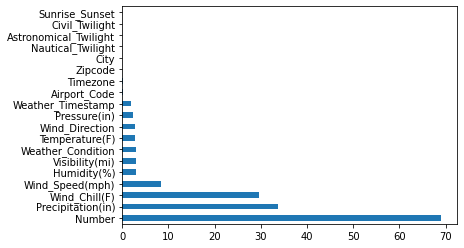

In [ ]:
missing_percentages[missing_percentages != 0].plot (kind= 'barh' )

## Exploratory Analysis and Visualization
Columns we'll analyze:

City

Start Time

Start Lat, Start Lng

Temperature

Weather Condition


In [ ]:
updated_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(updated_df.City.unique())

10658

In [ ]:
cities_by_accident = updated_df.City.value_counts()
cities_by_accident[:40]

Los Angeles        39984
Miami              36233
Charlotte          22203
Houston            20843
Dallas             19497
Sacramento         18431
Orlando            16169
Portland           14805
San Diego          14090
Minneapolis        12653
Atlanta            11854
Chicago            11507
Saint Paul         10084
Phoenix             9934
Raleigh             9516
San Jose            9362
Richmond            8472
Nashville           8381
Riverside           8201
Jacksonville        7815
Salt Lake City      7737
Kansas City         7500
Baton Rouge         7085
Austin              7038
Oakland             6978
Tucson              6908
Denver              6803
San Bernardino      6653
Seattle             6531
New Orleans         6479
Anaheim             6209
Ontario             6151
Fort Lauderdale     6103
Bakersfield         6048
Tampa               5987
Long Beach          5893
Corona              5813
Bronx               5563
Rochester           5396
Detroit             5245


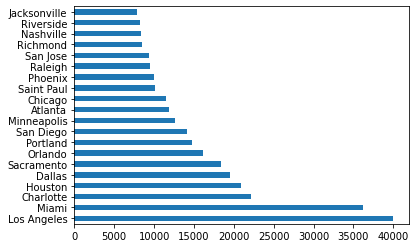

In [ ]:
cities_by_accident[:20].plot(kind='barh', )

In [ ]:
#percent of city with less than 1000 accidents 

less_than_1000 = cities_by_accident[cities_by_accident >= 1000]
less_than_1000

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Elgin           1007
Chandler        1006
Palo Alto       1006
Flushing        1001
Sandy           1001
Name: City, Length: 251, dtype: int64

In [ ]:
len(df.City) 

1516064

In [ ]:
cities_lessthan_10 = cities_by_accident[cities_by_accident<=10]
cities_lessthan_10


Leicester         10
Springerville     10
Eldred            10
New Providence    10
Scottsboro        10
                  ..
New Leipzig        1
Lamoni             1
Canal Point        1
Camanche           1
Arab               1
Name: City, Length: 4883, dtype: int64

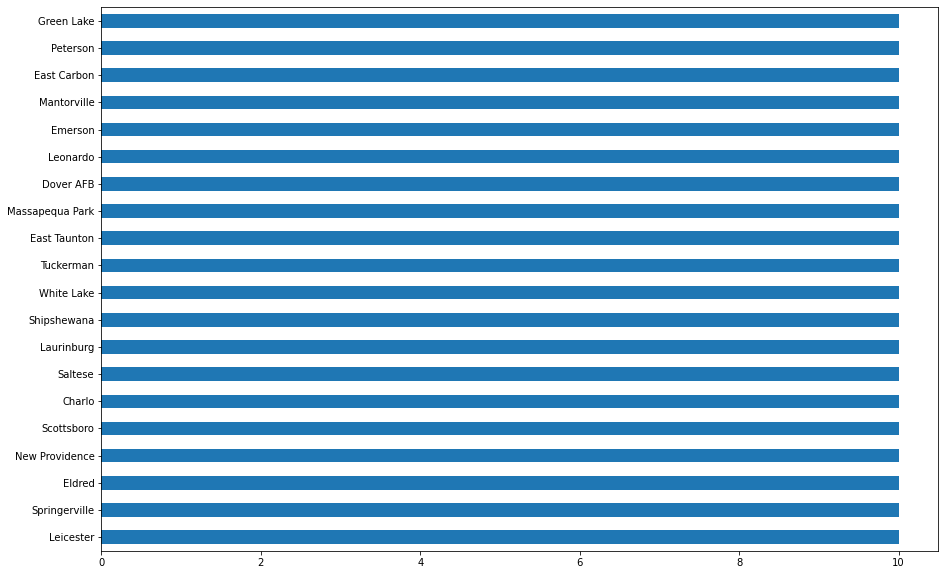

In [ ]:
cities_lessthan_10[:20].plot(kind= 'barh', figsize=(15, 10))

In [ ]:
state_by_accidents = df.State.value_counts()
state_by_accidents

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

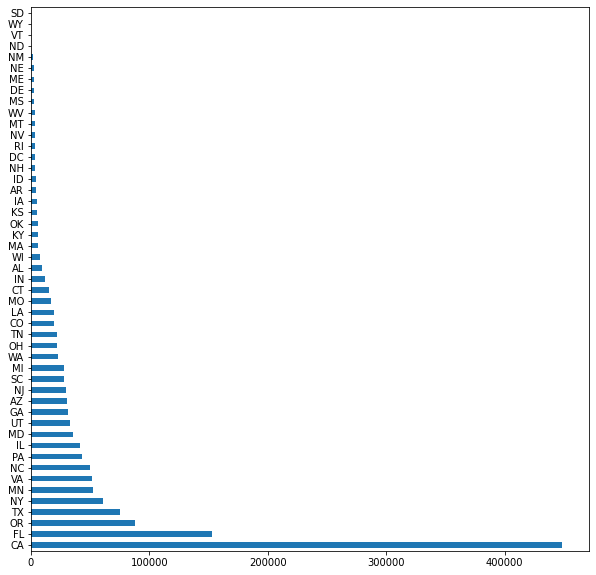

In [ ]:
state_by_accidents.plot(kind='barh', figsize=(10,10 ))

###Time analysis
## The number is similar on weekends' hours. However on weekdays the number is high during the same time from 8 to 10 and from 16 to 18

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time.value_counts()

2020-12-16 13:53:25    117
2020-09-30 12:41:30     88
2017-05-15 09:22:55     74
2020-10-12 11:13:30     64
2020-12-16 13:54:00     63
                      ... 
2020-02-12 09:54:06      1
2020-05-29 18:25:21      1
2019-01-10 18:08:10      1
2016-09-28 23:01:18      1
2020-11-21 15:39:00      1
Name: Start_Time, Length: 1014168, dtype: int64

In [ ]:
len(df.Start_Time.value_counts())


1014168

In [ ]:
#check the Hour in which most accidents occur

import datetime as dt

ConvertedTime = pd.to_datetime(df['Start_Time'])
ConvertedTimeToHour = pd.to_datetime(df['Start_Time']).dt.hour
ConvertedTimeToHour


0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

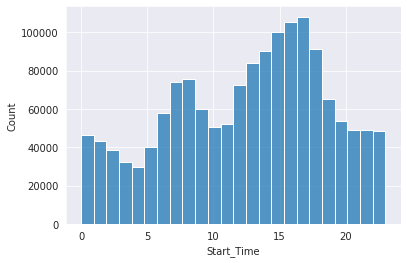

In [ ]:
#plotting the accidents by hour
import seaborn as sns
sns.set_style("darkgrid")
#ConvertedTimeToHour[:2000].plot(kind= "hist", figsize = (10,10))
sns.histplot(ConvertedTimeToHour, bins=24)


A high percentage of accidents occur between 8 to 10 in the morning and then at 2 to 6

In [ ]:
#check the Day of the week in which most accidents occur

WeekDay = ConvertedTime.dt.dayofweek
WeekDay

0          0
1          0
2          0
3          0
4          0
          ..
1516059    4
1516060    4
1516061    4
1516062    4
1516063    4
Name: Start_Time, Length: 1516064, dtype: int64

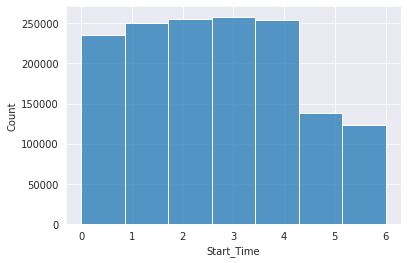

In [ ]:
#plotting the accidents by day of week

sns.histplot(WeekDay, bins=7)

## The number of accidents decreases on weekends and there are less accidents

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


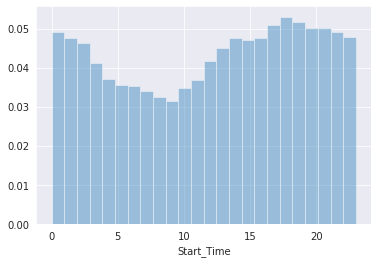

In [ ]:
#Is the distribution of accidents by hour the same on weekends as on weekdays?
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


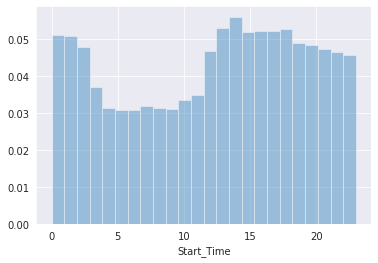

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(saturdays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


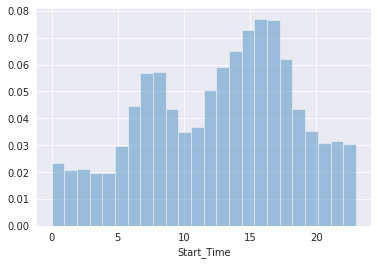

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


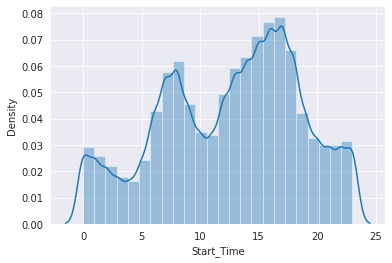

In [ ]:
tuesdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 1]
sns.distplot(tuesdays_start_time.dt.hour, bins=24, kde=True, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


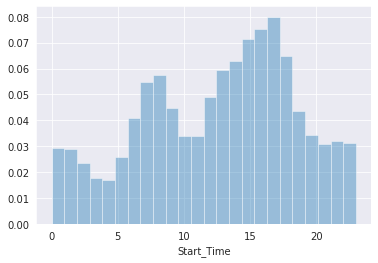

In [ ]:
wednesdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.distplot(wednesdays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

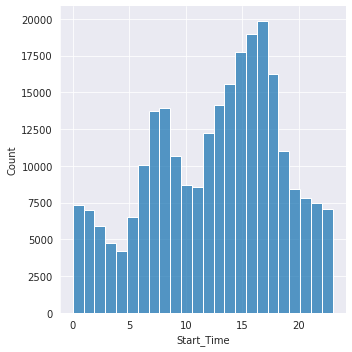

In [ ]:
thursdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 3]
sns.displot(thursdays_start_time.dt.hour, bins=24, kde=False)

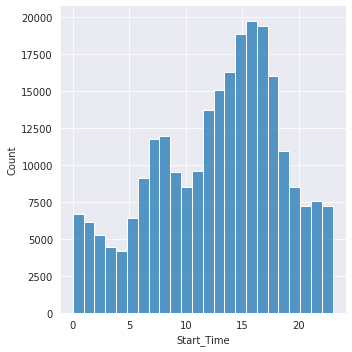

In [ ]:
fridays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
sns.displot(fridays_start_time.dt.hour, bins=24, kde=False)

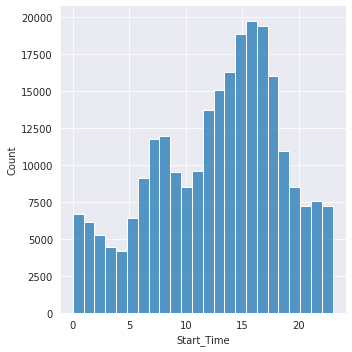

In [ ]:
fridays_start_time = pd.to_datetime(df.Start_Time[df.Start_Time.dt.dayofweek == 4])
sns.displot(fridays_start_time.dt.hour, bins=24)


In [ ]:
fridays_start_time

139       2016-02-12 10:07:44
140       2016-02-12 16:15:51
141       2016-02-12 19:29:53
142       2016-02-12 22:22:57
143       2016-02-12 22:26:48
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 254127, dtype: datetime64[ns]

###Check number of accidents based on temperature

Findingss


1.   
2.   List item



In [ ]:
df['Temperature(F)'].describe().apply(lambda x: format(x, 'f'))

count    1473031.000000
mean          59.584597
std           18.273164
min          -89.000000
25%           47.000000
50%           61.000000
75%           73.000000
max          170.600000
Name: Temperature(F), dtype: object

In [ ]:
df['Temperature(F)'].value_counts()

 59.0     32387
 63.0     31595
 68.0     30898
 57.0     30862
 64.0     30778
          ...  
-10.7         1
 116.1        1
-1.5          1
-4.5          1
-22.4         1
Name: Temperature(F), Length: 775, dtype: int64

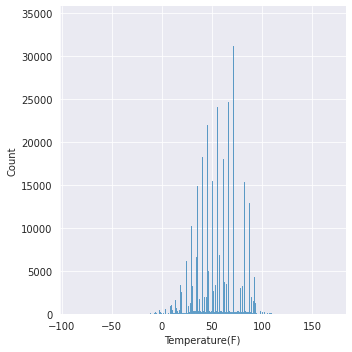

In [ ]:
sns.displot( df['Temperature(F)'])

In [ ]:
temp_above_mean = df['Temperature(F)'][df['Temperature(F)'].between(40, 100)]

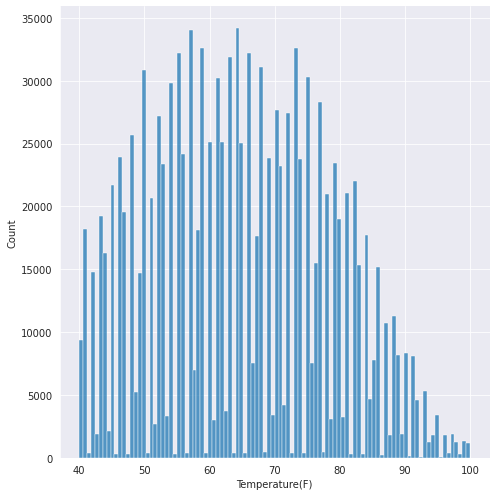

In [ ]:
 sns.displot(temp_above_mean, height= 7, bins= 100)  #it is crashing the RAM, check for solutions. #was able to create displot. Solution, make sure to add df+column name df['Temperature(F)'][df['Temperature(F)'].between(40, 100)]

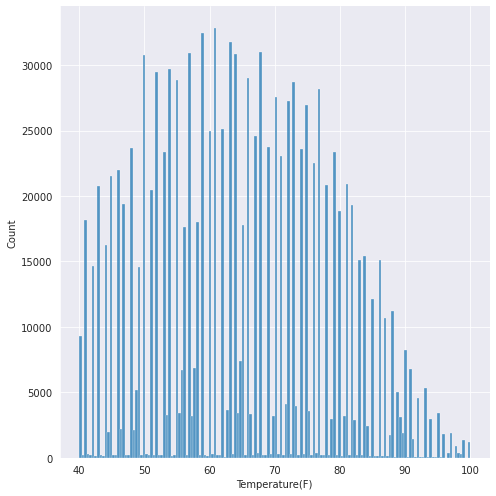

In [ ]:
temp_bet_40_to_80 = df['Temperature(F)'][df['Temperature(F)'].between(40, 30)]
sns.displot(temp_above_mean, height= 7)  

In [ ]:
df['Temperature(F)'].describe()

count    1.473031e+06
mean     5.958460e+01
std      1.827316e+01
min     -8.900000e+01
25%      4.700000e+01
50%      6.100000e+01
75%      7.300000e+01
max      1.706000e+02
Name: Temperature(F), dtype: float64

In [ ]:
#ax = plt.subplot()
#sns.distplot(temp_above_mean, ax=ax)
#ax.set_xlim(1,19)
#ax.set_xticks(range(1,100))
#plt.show()

In [ ]:
 df['Temperature(F)'][df['Temperature(F)']  > 59]

316        64.0
319        61.0
322        61.7
323        64.0
326        60.1
           ... 
1516059    86.0
1516060    70.0
1516061    73.0
1516062    71.0
1516063    79.0
Name: Temperature(F), Length: 771366, dtype: float64

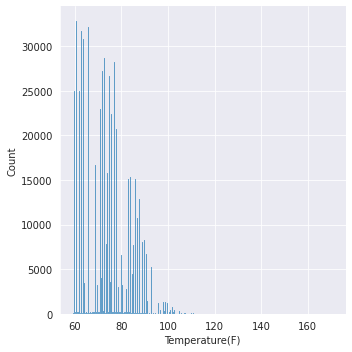

In [ ]:
sns.displot( df['Temperature(F)'][df['Temperature(F)']  > 59] )

### Matplotlib practice

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df['Weather_Condition'].value_counts().head(5)

Fair             465252
Mostly Cloudy    193595
Clear            180223
Cloudy           161291
Partly Cloudy    133102
Name: Weather_Condition, dtype: int64

Text(0, 0.5, 'Counts')

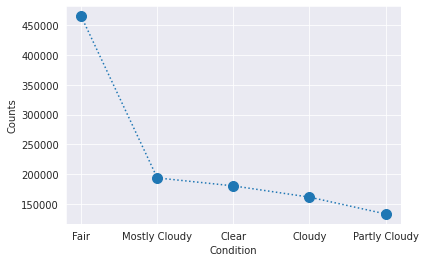

In [ ]:
plt.plot(df['Weather_Condition'].value_counts().head(5), marker = 'o', ms = 10, linestyle = 'dotted')
plt.xlabel('Condition')
plt.ylabel('Counts')